In [390]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os

In [391]:
df2 = pd.read_parquet(r'C:\Users\Abdon.RAMIREZ-BRICEN\OneDrive - Akkodis\Desktop\EDA_PC\Data\Processed\PcDataClean.parquet',engine='fastparquet')

In [392]:
pc = pd.read_csv(r'C:\Users\Abdon.RAMIREZ-BRICEN\OneDrive - Akkodis\Desktop\EDA_PC\Data\Raw\test.csv')

In [393]:
df = pc.copy()

In [394]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         391 non-null    int64  
 1   Company           391 non-null    object 
 2   Product           391 non-null    object 
 3   TypeName          391 non-null    object 
 4   Inches            391 non-null    float64
 5   ScreenResolution  391 non-null    object 
 6   Cpu               391 non-null    object 
 7   Ram               391 non-null    object 
 8   Memory            391 non-null    object 
 9   Gpu               391 non-null    object 
 10  OpSys             391 non-null    object 
 11  Weight            391 non-null    object 
dtypes: float64(1), int64(1), object(10)
memory usage: 36.8+ KB


In [395]:
df.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
dtype: int64

In [396]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
0,539,Asus,Zenbook UX510UW-FI095T,Notebook,15.6,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 7500U 2.7GHz,8GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2kg
1,327,Asus,ZenBook UX410UA-GV183T,Notebook,14.0,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2kg
2,563,Mediacom,SmartBook 130,Notebook,13.3,IPS Panel Full HD 1920x1080,Intel Atom x5-Z8350 1.44GHz,4GB,32GB Flash Storage,Intel HD Graphics,Windows 10,1.35kg
3,13,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.8GHz,16GB,256GB SSD,AMD Radeon Pro 555,macOS,1.83kg
4,935,HP,EliteBook 850,Ultrabook,15.6,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,8GB,256GB SSD,AMD Radeon R7 M365X,Windows 10,1.84kg


In [397]:
df.tail()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
386,742,Lenovo,ThinkPad 13,Notebook,13.3,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.44kg
387,660,Dell,XPS 13,Ultrabook,13.3,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.2kg
388,983,Lenovo,IdeaPad 310-15IKB,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,6GB,256GB SSD,Nvidia GeForce 920MX,Windows 10,2.4kg
389,1137,HP,EliteBook 1040,Notebook,14.0,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 7,1.43kg
390,556,Lenovo,ThinkPad T570,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,512GB SSD,Intel HD Graphics 620,Windows 10,1.99kg


In [398]:
df.columns

Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight'],
      dtype='object')

In [399]:
df.shape

(391, 12)

In [400]:
df.describe()

,laptop_ID,Inches
count,391.000000,391.000000
mean,658.493606,15.157545
std,378.687395,1.412449
min,3.000000,10.100000
25%,335.000000,14.000000
50%,660.000000,15.600000
75%,983.500000,15.600000
max,1317.000000,17.300000


In [401]:
df[df.duplicated()]

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight


In [402]:
df_ob = df.select_dtypes('object')
for col in df_ob.columns:
    print(f'==========={col}===========')
    print(f'Numero de unicos: {df[col].nunique()}')
    print(f'Valores Unicos: {df[col].unique()}')
    print('\n')

===========Company===========
Numero de unicos: 16
Valores Unicos: ['Asus' 'Mediacom' 'Apple' 'HP' 'Lenovo' 'MSI' 'LG' 'Dell' 'Acer'
 'Toshiba' 'Microsoft' 'Razer' 'Vero' 'Samsung' 'Xiaomi' 'Fujitsu']


===========Product===========
Numero de unicos: 261
Valores Unicos: ['Zenbook UX510UW-FI095T' 'ZenBook UX410UA-GV183T' 'SmartBook 130'
 'MacBook Pro' 'EliteBook 850' 'IdeaPad 320-15AST' 'GT72VR Dominator'
 '15-ay047nv (i3-6006U/6GB/1TB/Radeon' 'Gram 15Z975' 'Latitude 3480'
 'Probook 650' 'Thinkpad X1' 'Vostro 3568' 'IdeaPad 320-15ISK'
 'GP72VR Leopard' 'GT80S 6QE' 'C740-C9QX (3205U/2GB/32GB/Chrome'
 'V310-15ISK (i5-7200U/8GB/1TB' 'Alienware 15' '250 G5' 'Omen 17-an012dx'
 'Zenbook UX330UA-AH5Q' 'Inspiron 7779' 'Inspiron 3567' 'ProBook 430'
 'Vostro 5568' '15-bs078cl (i7-7500U/8GB/2TB/W10)' 'Flex 5'
 'Inspiron 5770' 'Yoga 920-13IKB' 'XPS 13'
 'X541NA-GO020T (N3350/4GB/1TB/W10)' 'Portege Z30-C-16P' 'Probook 450'
 'Chromebook 14' 'GP72MVR 7RFX' 'FX753VD-GC461T (i7-7700HQ/16GB/1TB'
 'ThinkP

In [403]:
df['Inches'] = df['Inches'].astype(float)

In [404]:
df['Ram(GB)'] = df['Ram'].replace('GB','',regex=True)

### Comenzamos con la limpieza de datos de la columna Product.

In [405]:
df['Product'] = df['Product'].str.replace(r'[()\-/]', ' ', regex=True)
 # quitamos caracteres especiales

In [406]:
df['Product'] = df.apply(lambda row: ' '.join([palabra for palabra in row['Product'].split() if palabra not in row['Cpu']]), axis=1)
# Con este lambda quitamos todo lo que esta en la columna CPU de la columna Product

In [407]:
sig = r'\b(\d+GB|\d+TB|FX-\d+|i[3579]-\d{4}\w*|Celeron|Radeon|GeForce|Intel HD|Linux|Chrome|W10|W7|FHD|No|12.3)\b'
df['Product'] = df['Product'].str.replace(sig, '', regex=True).str.strip()
# Quitamos las memorias, procesadores y algunos sistemas operativos

In [408]:
patron = r'\d+(\.\d+)?\"'
df['Product'] = df['Product'].apply(lambda x: re.sub(patron,'',x))
# Quitamos del producto las inchas ya que las tenemos en una columna aparte.

En esta columna no dividimos nada, solo quitamos datos que ya teniamos en otras columnas para simplificarlos.

### Pasamos a la columna TypeName

In [409]:
df['TypeName'] = df['TypeName'].apply(lambda x: 'Convertible' if x == '2 in 1 Convertible' else x )

# Siguiendo el patron de los otros TypeName elinimanos el "2 in 1" del TypeName, para solo usar 1 palabra.

### Columna ScreenResolution:

In [410]:
df['Resolution'] = df['ScreenResolution'].str.extract(r'(\d+x\d+)')
# Separamos la Resolucion.

df['PanelType'] = df['ScreenResolution'].str.findall(r'(IPS Panel|Retina Display|Quad HD\+|Full HD|4K Ultra HD)').str.join(', ')
df['PanelType'] = df['PanelType'].apply(lambda x: 'No penal type' if x == "" else x)
# separamos el tipo de panel

df['Touchscreen'] = df['ScreenResolution'].str.contains(r'Touchscreen', case=False, na=False)
df['Touchscreen'] = df['Touchscreen'].apply(lambda x: 1 if x else 0)
# Transformamos a tipo bool si es touch o no.


In [411]:
df = df[['laptop_ID','Company','Product','TypeName','Inches','Resolution','PanelType','Touchscreen','Cpu'
         ,'Ram(GB)','Memory','Gpu','OpSys','Weight']]
# Ordenamos el DataFrame


Esta columna la separamos en 3: Resolution, PanelType y TouchScreen. El ultimo booleano.

### Columna CPU

In [412]:
pat = r'\b(\d+(?:\.\d+)?)\s*GHz\b'
df['ProcessorSpeed(GHz)'] = df['Cpu'].str.extract(f'{(pat)}')

# Primero extraemos la velocidad del procesador.

In [413]:
df['Cpu'] = df.apply(lambda row: ' '.join([palabra for palabra in row['Cpu'].split() if palabra not in row['ProcessorSpeed(GHz)']]),axis=1)
df['ProcessorSpeed(GHz)'] = df['ProcessorSpeed(GHz)'].astype(float)
# Eliminamos la velocidad de la columna Cpu

In [414]:
# Extraemos el tipo de procesador (i3, i5, i7, etc.)
df['ProcessorType'] = df['Cpu'].str.extract(r'(i3|i5|i7|i9|AMD Ryzen|AMD A4-Series|AMD A9-Series|AMD E-Series|AMD A6-Series|AMD|Xeon|FX|Celeron|Pentium|Atom|Cortex|M)')

In [415]:
df['Core'] = df['Cpu'].str.extract(r'\b(Dual|Quad|Core)')
df['Core'] = df['Core'].map({'Core':0,'Dual':2,'Quad':4})
df['Core'] = df['Core'].fillna(0) 
# Extraemos los nucleos de la columna Cpu, y les asignamos un numero.

In [416]:
df['Cpu'] = df['Cpu'].replace(pat,'',regex=True)

In [417]:
def obtener_identificador(cpu):
    if not isinstance(cpu, str):
        return None
    palabras = cpu.split()
    if not palabras:
        return None
    if len(palabras[-1]) > 2:
        return palabras[-1]
    elif len(palabras) >= 2:
        return palabras[-2]
    else:
        return None
    
    # Descubrimos que la mayoria de veces, la palabra final es el modelo de identificacion. Creamos esta funcion para extraerla.

In [418]:
df['ModelIdentifier'] = df['Cpu'].apply(obtener_identificador) # Aplicamos la funcion
df['ModelIdentifier'] = df['ModelIdentifier'].apply(lambda x: '7200' if x == 'M' or x == 'Core' else x)

# Quitamos 'M' y 'Core' que no corresponden a modelos de identificacion.

La columna Cpu la dividimos en 4: ProcessorSpeed, ProcessorType, ModelIdentifier y Core. Core le pusimos valor a los que especificaban el nuemro de nucleos, ejemplo: los que solo tienen 'core', no especifica esos pusimos 0, dual con 2 y Quad 4.

In [419]:
df = df[['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches', 'Resolution',
       'PanelType', 'Touchscreen', 'ProcessorType','ModelIdentifier','Core','ProcessorSpeed(GHz)', 'Ram(GB)', 'Memory', 'Gpu', 'OpSys',
       'Weight']]

# Ordenamos el DataFrame

### Columna Memory

In [420]:
df['Memory SSD GB'] = df['Memory'].apply(lambda x: x if 'SSD' in x else 0).str.split('+').str[0].fillna(0)
df['Memory HDD GB'] = df['Memory'].apply(lambda x: x if 'HDD' in x else 0).str.split('+').str[-1].fillna(0)
df['Memory FL STO GB'] = df['Memory'].apply(lambda x: x if 'Flash' in x else 0).str.split('+').str[0].fillna(0)
df['Memory Hybrid GB'] = df['Memory'].apply(lambda x: x if 'Hybrid' in x else 0)
# Separamos las memorias por tipo

In [421]:
df['Memory SSD GB'] = df['Memory SSD GB'].str.replace(r'[a-zA-Z]','',regex=True).str.strip().astype(float).fillna(0)
df['Memory SSD GB'] = df['Memory SSD GB'].apply(lambda x: x*1000 if x <= 2 else x)
df['Memory HDD GB'] = df['Memory HDD GB'].str.replace(r'[a-zA-Z]','',regex=True).str.strip().astype(float).fillna(0)
df['Memory HDD GB'] = df['Memory HDD GB'].apply(lambda x: x*1000 if x <= 2 else x)
df['Memory FL STO GB'] = df['Memory FL STO GB'].str.replace(r'[a-zA-Z]','',regex=True).str.strip().astype(float).fillna(0)
df['Memory FL STO GB'] = df['Memory FL STO GB'].apply(lambda x: x*1000 if x <= 2 else x)
df['Memory Hybrid GB'] = df['Memory Hybrid GB'].str.replace(r'[a-zA-Z]','',regex=True).str.strip().astype(float).fillna(0)
df['Memory Hybrid GB'] = df['Memory Hybrid GB'].apply(lambda x: x*1000 if x <= 2 else x)

# Eliminamos todas las letras para dejar solo dato numerico en las columnas.

In [422]:
df = df[['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches', 'Resolution',
       'PanelType', 'Touchscreen', 'ProcessorType','ModelIdentifier','Core','ProcessorSpeed(GHz)', 'Ram(GB)', 'Memory SSD GB','Memory HDD GB','Memory FL STO GB','Memory Hybrid GB', 'Gpu', 'OpSys',
       'Weight']]

La columna Memory la dividimos en 2: Memory 1 y Memory 2. Los pc que no tenian Memory 2 los llenamos con "No Memory 2"

### Columna Gpu

In [423]:
df.loc[:,'Gpu'] = df['Gpu'].str.replace(r'^(Intel|AMD)\s*', '', case=False, regex=True).str.strip()
# Quitamos Intel y AMD de la columna Gpu debido a que este dato lo tenemos en otra columna.

df[['GpuBrand', 'GpuModel']] = df['Gpu'].str.extract(r'([A-Za-z]+(?:\s+[A-Za-z]+)*)\s*([\d\w]+)?')
# Separamos entre marca y modelo la columna GPU.
df['GpuModel'] = df['GpuModel'].fillna('0')

In [424]:
df['GpuModel'].unique()

array(['960M', '620', '0', '555', '7', '2', '1070', '5', '520', '1060',
       '980M', '405', '580', '940MX', '970M', '530', '500', '930MX',
       '510', '1050', '1200', '640', '1080', '950M', '5300', '6000',
       '400', '3000M', '9', '455', '4190M', '505', '150', '930M', '130',
       '965M', '515', '920M', '150MX', '615', '920MX', '1050Ti', '540',
       '650', '960', '1000M', '4', '630', '860'], dtype=object)

In [425]:
df = df[['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches', 'Resolution',
       'PanelType', 'Touchscreen', 'ProcessorType','ModelIdentifier','Core','ProcessorSpeed(GHz)', 
       'Ram(GB)', 'Memory SSD GB','Memory HDD GB','Memory FL STO GB','Memory Hybrid GB', 'GpuBrand','GpuModel', 'OpSys',
       'Weight']]

La columna Gpu la dividimos en 2: GpuBrand y GpuModel. Marca y modelo repsectivamente.

### Columna OpSys

In [426]:
df['OpSys'] = df['OpSys'].str.replace(r'(10|10\s*S|7|X)\s*$', '', regex=True).str.strip()
df['OpSys'] = df['OpSys'].str.replace('macOS','Mac OS')

In [427]:
df['Weight(KG)'] = df['Weight'].replace('kg','',regex=True)
df['Weight(KG)'] = df['Weight(KG)'].astype(float)

# Le quitamos kg a la columna Weight para un mejor analisis.

In [428]:
df = df[['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches', 'Resolution',
       'PanelType', 'Touchscreen', 'ProcessorType','ModelIdentifier','Core','ProcessorSpeed(GHz)', 
       'Ram(GB)', 'Memory SSD GB','Memory HDD GB','Memory FL STO GB','Memory Hybrid GB', 'GpuBrand','GpuModel', 'OpSys',
       'Weight(KG)']]

Simplemente borramos Las versiones, creemos que el analisis seria mejor asi.

In [429]:
df['Ram(GB)'] = df['Ram(GB)'].astype(int)

In [430]:
df['TypeName'] = df['TypeName'].map({'Convertible':1,'Gaming':2, 'Workstation':3, 'Notebook':4, 'Ultrabook':5, 'Netbook':6})

In [431]:
df[['Ancho', 'Alto']] = df['Resolution'].str.split('x', expand=True).astype(int)
df['Pixeles'] = df['Ancho'] * df['Alto']
df['AspectRatio'] = df['Ancho'] / df['Alto']

In [432]:
df['ProcessorType'] = df['ProcessorType'].map({'i7':1,'Atom':2, 'AMD E-Series':3, 'i3':4, 'i5':5, 'Celeron':6,
                                          'Pentium':7,'AMD A9-Series':8,'M':9,'AMD':10, 'Xeon':11, 'AMD A6-Series':12, 'Cortex':13, 'AMD Ryzen':4})
df['ProcessorType'] = df['ProcessorType'].fillna(15)

In [433]:
df['ModelIdentifier'] = [re.sub(r'[A-Za-z&-]', '', modelo) for modelo in df['ModelIdentifier']]
df['ModelIdentifier'] = df['ModelIdentifier'].astype(int)

In [434]:
df['GpuModel'] = [re.sub(r'[A-Za-z&-]', '', modelo) for modelo in df['GpuModel']]
df['GpuModel'] = df['GpuModel'].astype(int)

In [435]:
df = df.drop(columns=['Product','Resolution'])

In [436]:
df['Company'].unique()

array(['Asus', 'Mediacom', 'Apple', 'HP', 'Lenovo', 'MSI', 'LG', 'Dell',
       'Acer', 'Toshiba', 'Microsoft', 'Razer', 'Vero', 'Samsung',
       'Xiaomi', 'Fujitsu'], dtype=object)

In [437]:
# a = ['Dell', 'Asus', 'HP', 'Toshiba', 'Lenovo', 'Google', 'LG', 'MSI',
#        'Acer', 'Mediacom', 'Apple', 'Microsoft', 'Fujitsu', 'Huawei',
#        'Xiaomi', 'Vero', 'Chuwi', 'Samsung', 'Razer']

# b = ['Asus', 'Mediacom', 'Apple', 'HP', 'Lenovo', 'MSI', 'LG', 'Dell',
#        'Acer', 'Toshiba', 'Microsoft', 'Razer', 'Vero', 'Samsung',
#        'Xiaomi', 'Fujitsu']

# Google 
# Chuwi
# Huawei
# np.isin(a,b)

In [438]:
# Agrupar compañías con menos de 10 apariciones en "Otros"
df['Company'] = df['Company'].apply(lambda x: x if df['Company'].value_counts()[x] > 10 else 'Otros')

# Agrupar tipos de paneles
# df['PanelType'] = df['PanelType'].apply(lambda x: x if df['PanelType'].value_counts()[x] > 10 else 'Otros')


In [439]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
# encoder = OneHotEncoder(handle_unknown='ignore',sparse_output=False)
# df_encoded = encoder.fit_transform(df[['Company']])

# # Convertir a DataFrame
# df_encoded = pd.DataFrame(df_encoded, columns=encoder.get_feature_names_out(['Company']))
# df = pd.concat([df,df_encoded],axis=1)
# df = df.drop(columns='Company')

In [440]:
# encoder_panel = OneHotEncoder(handle_unknown='ignore',sparse_output=False)
# df_encoded_panel = encoder_panel.fit_transform(df[['PanelType']])

# # Convertir a DataFrame
# df_encoded_panel = pd.DataFrame(df_encoded_panel, columns=encoder_panel.get_feature_names_out(['PanelType']))
# df = pd.concat([df,df_encoded_panel],axis=1)
# df = df.drop(columns='PanelType')

In [441]:
# encoder_op = OneHotEncoder(handle_unknown='ignore',sparse_output=False)
# df_encoded_op = encoder_op.fit_transform(df[['OpSys']])

# # Convertir a DataFrame
# df_encoded_op = pd.DataFrame(df_encoded_op, columns=encoder_op.get_feature_names_out(['OpSys']))
# df = pd.concat([df,df_encoded_op],axis=1)
# df = df.drop(columns='OpSys')

In [442]:
enc = LabelEncoder()
df['GpuBrand'] = enc.fit_transform(df['GpuBrand'])
df['OpSys'] = enc.fit_transform(df['OpSys'])
df['PanelType'] = enc.fit_transform(df['PanelType'])
df['Company'] = enc.fit_transform(df['Company'])

In [443]:
# df['Company_Apple'] =  0

In [444]:
df.columns

Index(['laptop_ID', 'Company', 'TypeName', 'Inches', 'PanelType',
       'Touchscreen', 'ProcessorType', 'ModelIdentifier', 'Core',
       'ProcessorSpeed(GHz)', 'Ram(GB)', 'Memory SSD GB', 'Memory HDD GB',
       'Memory FL STO GB', 'Memory Hybrid GB', 'GpuBrand', 'GpuModel', 'OpSys',
       'Weight(KG)', 'Ancho', 'Alto', 'Pixeles', 'AspectRatio'],
      dtype='object')

In [445]:
df.shape

(391, 23)

In [446]:
df.to_csv('test_clean_label.csv',index =False)

## Terminando con la limpieza y future engineer, nos quedamos con estas variables.

|Variable|Descripcion|
|----|----|
|Laptop_ID|Indice.|
|Company|Compañia fabricante.|
|Product|Nombre del PC.|
|TypeName|Tipo de PC.|
|Inches|Tamaño de pantalla.|
|Resolution|Resolucion de pantalla.|
|PanelType|Tipo de panel.|
|TouchScreen|Tipo Bool, si la pantalla es touch o no.|
|ProcessorType|Tipo de procesador.|
|ModelIdentifier|Identificador del modelo.|
|Core|Cantidad de Nucleos.|
|ProcessorSpeed|Velocidad de Procesador.|
|Ram|Memoria Ram.|
|Memory SSD GB|Memoria SSD|
|Memory HDD GB|Memoria Nro SSD|
|Memory FL STO GB|Memoria Flash Storage|
|Memory Hybrid GB|MEmoria Hibrida|
|GpuBrand|Marca de Gpu.|
|GpuModel|Modelo de Gpu.|
|OpSys|Sistema operativo.|
|Weight|Peso del PC.|
|Price_euros|Precio de PC.|


## Analisis Univariante.

In [173]:
import sys
sys.path.append(r'C:\Users\Abdon.RAMIREZ-BRICEN\OneDrive - Akkodis\Documents\Analisis_datos_eda\scripts')

In [174]:
# os.chdir(r'C:\Users\Abdon.RAMIREZ-BRICEN\OneDrive - Akkodis\Documents\Analisis_datos_eda\scripts\ClaseAbdon.py')

In [175]:
from ClaseAbdon import DataFrameAnalyzer
# Importo mi clase

In [176]:
clase = DataFrameAnalyzer(df)

In [177]:
clase.test_Ksmirnov()

['Resultados test Kolmogorov-Smirnov columna laptop_ID       : Estadistico:0.9986501019683699 P_VALOR:0.0',
 'Resultados test Kolmogorov-Smirnov columna TypeName       : Estadistico:0.8800631672845574 P_VALOR:0.0',
 'Resultados test Kolmogorov-Smirnov columna Inches       : Estadistico:1.0 P_VALOR:0.0',
 'Resultados test Kolmogorov-Smirnov columna Touchscreen       : Estadistico:0.5 P_VALOR:6.48883190065457e-91',
 'Resultados test Kolmogorov-Smirnov columna ProcessorType       : Estadistico:0.8413447460685429 P_VALOR:1.283040536916e-311',
 'Resultados test Kolmogorov-Smirnov columna Core       : Estadistico:0.5 P_VALOR:6.48883190065457e-91',
 'Resultados test Kolmogorov-Smirnov columna ProcessorSpeed(GHz)       : Estadistico:0.8889347236457106 P_VALOR:0.0',
 'Resultados test Kolmogorov-Smirnov columna Ram(GB)       : Estadistico:0.9897381497300339 P_VALOR:0.0',
 'Resultados test Kolmogorov-Smirnov columna Memory SSD GB       : Estadistico:0.6803069053708439 P_VALOR:5.573870174361395e-1

In [178]:
from scipy.stats import shapiro, anderson, normaltest

In [179]:
num = df.select_dtypes(include='number')

for n in num:
    stat, p = normaltest(df[n])
    print(f'{n}: Dagostino test         statistic: {stat}, p-value: {p}')

laptop_ID: Dagostino test         statistic: 219.65756531651616, p-value: 2.0043138955367936e-48
TypeName: Dagostino test         statistic: 35.3144089001302, p-value: 2.1457224321627436e-08
Inches: Dagostino test         statistic: 10.446753532208236, p-value: 0.0053891006347303845
Touchscreen: Dagostino test         statistic: 141.44630713215832, p-value: 1.9289664025382044e-31
ProcessorType: Dagostino test         statistic: 36.25782894011431, p-value: 1.3387900708804086e-08
Core: Dagostino test         statistic: 369.21863011363615, p-value: 6.686412456695285e-81
ProcessorSpeed(GHz): Dagostino test         statistic: 41.3330521698563, p-value: 1.0583803332052327e-09
Ram(GB): Dagostino test         statistic: 153.7922210581063, p-value: 4.022013439108912e-34
Memory SSD GB: Dagostino test         statistic: 90.44512720258501, p-value: 2.2913433437984308e-20
Memory HDD GB: Dagostino test         statistic: 31.22097190705375, p-value: 1.6613153986961994e-07
Memory FL STO GB: Dagostino 

In [180]:
clase.resumen()

,Columna,Tipo de Dato,Cardinalidad,% Cardinalidad,Valores Faltantes,% Valores Faltantes,Categoría
0,laptop_ID,int64,391,100.00,0,0.0,Índice Numérico
1,Company,object,16,4.09,0,0.0,Categórica Nominal
2,Product,object,257,65.73,0,0.0,Categórica Nominal
3,TypeName,int64,6,1.53,0,0.0,Numérica Discreta
4,Inches,float64,13,3.32,0,0.0,Numérica Continua
5,Resolution,object,12,3.07,0,0.0,Categórica Nominal
6,PanelType,object,9,2.30,0,0.0,Categórica Nominal
7,Touchscreen,int64,2,0.51,0,0.0,Binaria
8,ProcessorType,int64,13,3.32,0,0.0,Numérica Discreta
9,ModelIdentifier,object,55,14.07,0,0.0,Índice Numérico


Podemos observar que hay una alta cardinalidad en el Nombre de producto y en el precio.
En el resto de variables hay una cardinalidad baja, es normal porque muchos PC tienen especificaciones "parecidas".

In [181]:
clase.describe_numeric()

,count,mean,median,mode,std_dev,min,25%,50%,75%,max,skewness,kurtosis
TypeName,391.0,3.478261e+00,4.000000e+00,4.000000e+00,1.270539e+00,1.00,2.000000e+00,4.000000e+00,4.000000e+00,6.000000e+00,-0.607018,-0.634414
Inches,391.0,1.515754e+01,1.560000e+01,1.560000e+01,1.412449e+00,10.10,1.400000e+01,1.560000e+01,1.560000e+01,1.730000e+01,-0.399939,-0.172250
Touchscreen,391.0,1.483376e-01,0.000000e+00,0.000000e+00,3.558897e-01,0.00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.986404,1.955780
ProcessorType,391.0,3.388747e+00,4.000000e+00,1.000000e+00,2.446824e+00,1.00,1.000000e+00,4.000000e+00,5.000000e+00,1.300000e+01,0.772351,0.587063
Core,391.0,1.636829e-01,0.000000e+00,0.000000e+00,6.514762e-01,0.00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,4.297069,19.053795
ProcessorSpeed(GHz),391.0,2.328645e+00,2.500000e+00,2.500000e+00,4.649984e-01,0.90,2.000000e+00,2.500000e+00,2.700000e+00,3.600000e+00,-0.899967,0.099222
Ram(GB),391.0,8.526854e+00,8.000000e+00,8.000000e+00,4.739217e+00,2.00,4.000000e+00,8.000000e+00,8.000000e+00,3.200000e+01,1.756725,4.895454
Memory SSD GB,391.0,1.835703e+02,2.560000e+02,2.560000e+02,1.716064e+02,0.00,0.000000e+00,2.560000e+02,2.560000e+02,1.000000e+03,1.164516,2.785433
Memory HDD GB,391.0,4.565217e+02,0.000000e+00,0.000000e+00,5.280852e+02,0.00,0.000000e+00,0.000000e+00,1.000000e+03,2.000000e+03,0.699466,-0.408636
Memory FL STO GB,391.0,3.437340e+00,0.000000e+00,0.000000e+00,2.992179e+01,0.00,0.000000e+00,0.000000e+00,0.000000e+00,5.120000e+02,14.308652,227.681139


Poco que mirar en las variables numericas, touchscreen es tipo bool y core "Numerica discreta". 
Con respecto al precio vemos que la mediana y la media estan relativamente "cerca", la moda es 499 y tiene una STD un poco elevada. lo que los precios varian considerablemente.

In [182]:
clase.describe_categorical()

,unique_values,most_frequent,frequency,proportion
Company,16,Dell,86,21.99
Product,257,Inspiron 3567,9,2.30
Resolution,12,1920x1080,266,68.03
PanelType,9,Full HD,176,45.01
ModelIdentifier,55,7200U,58,14.83
GpuBrand,15,HD Graphics,176,45.01
GpuModel,49,620,104,26.60
OpSys,6,Windows,337,86.19


En este DF vemos que la compañia Dell es la que mas frecuenta entre las marcas. El producto "XPS 13" el mas frecuente entre ellos, el sistema operativo mas frecuente es Window.. etc.

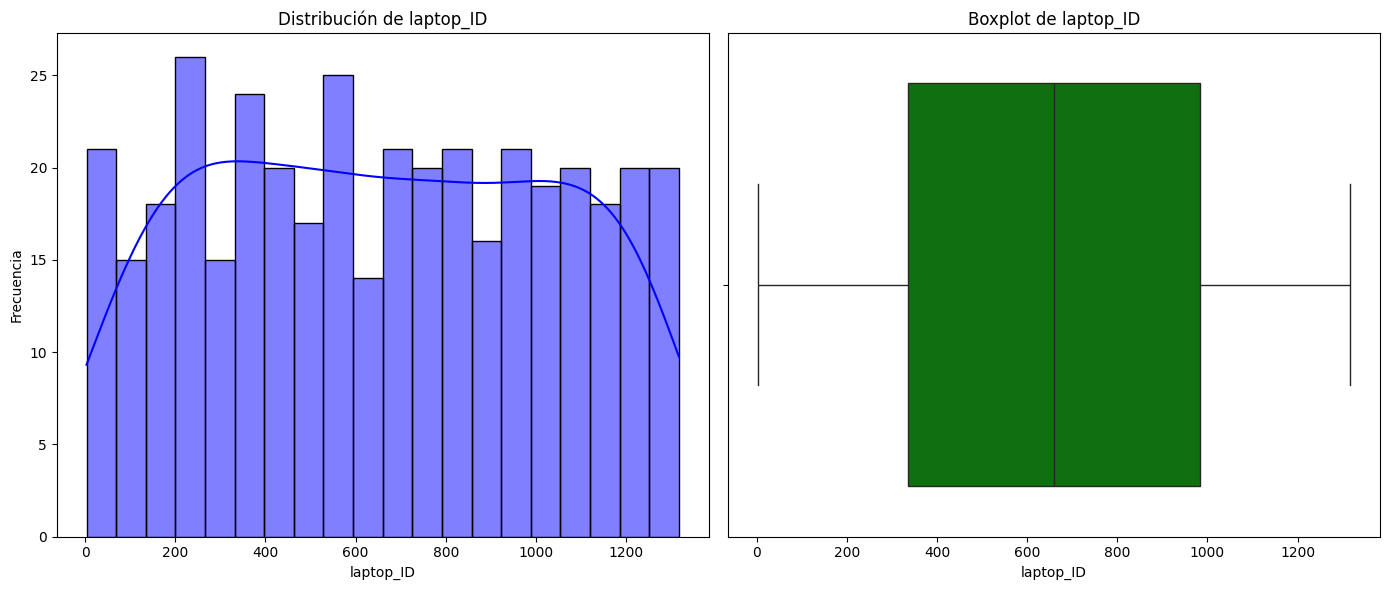

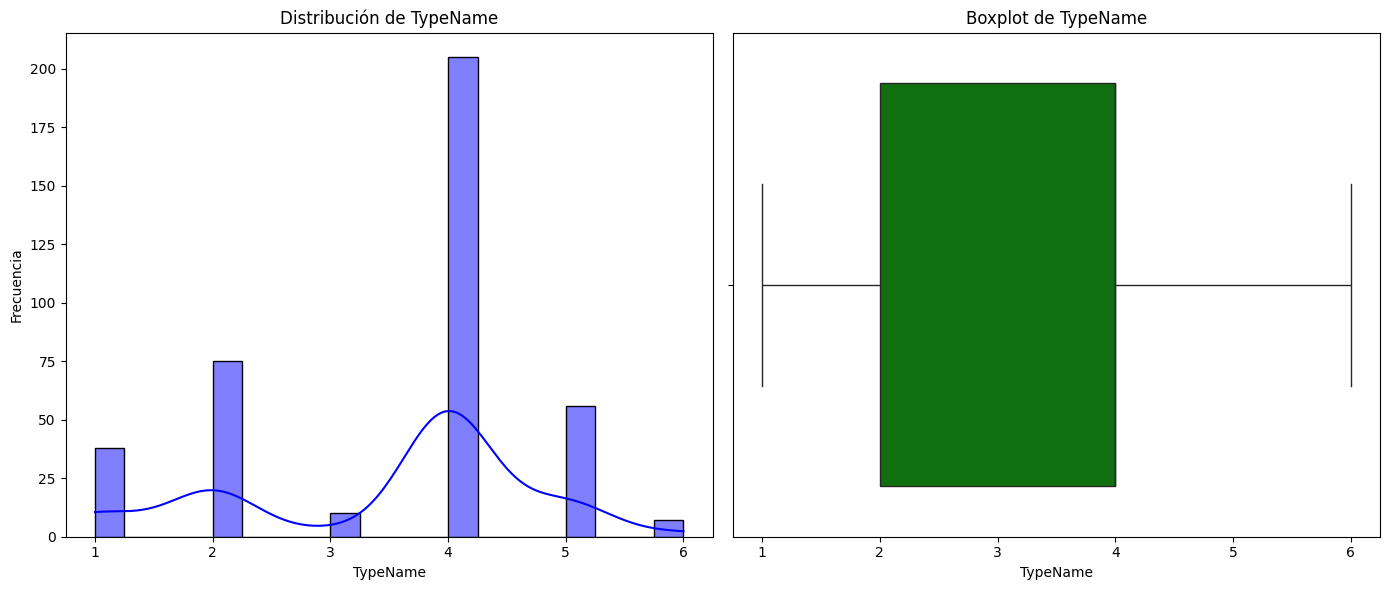

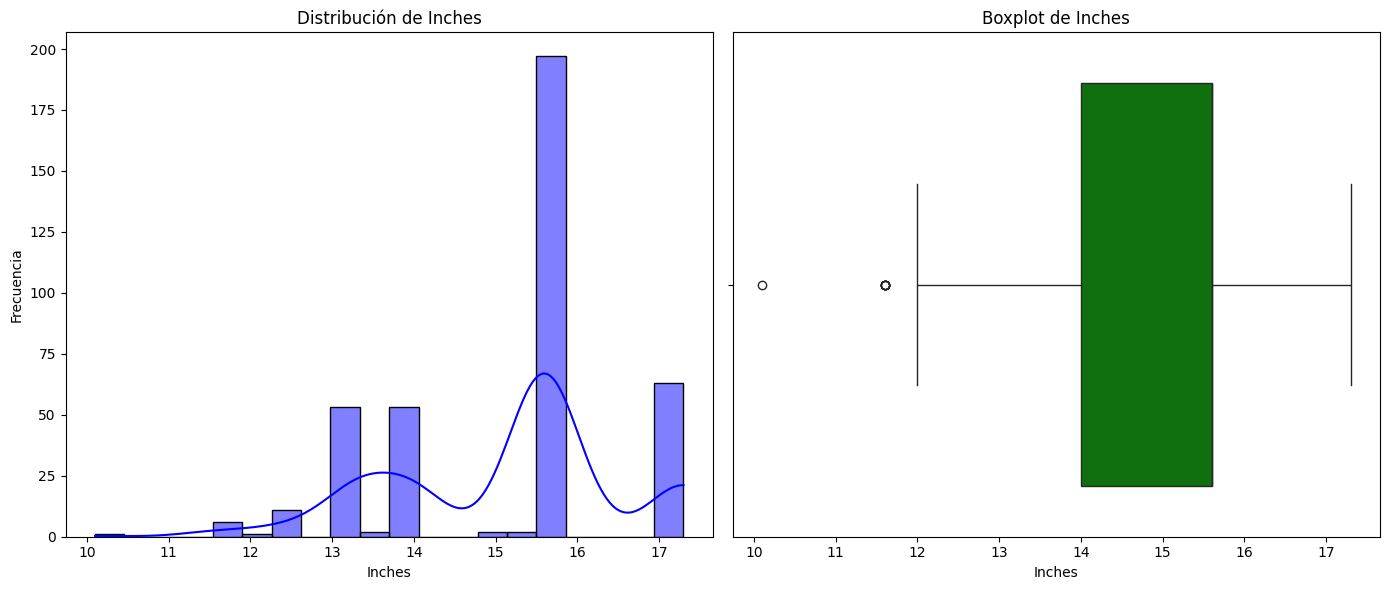

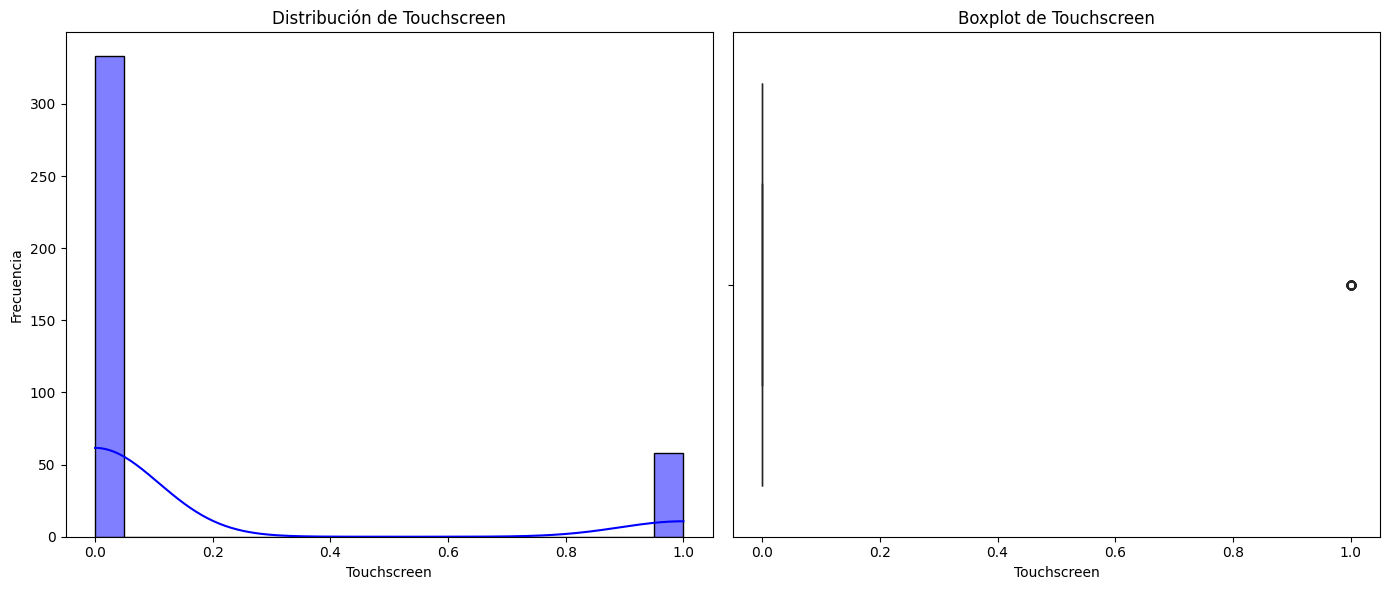

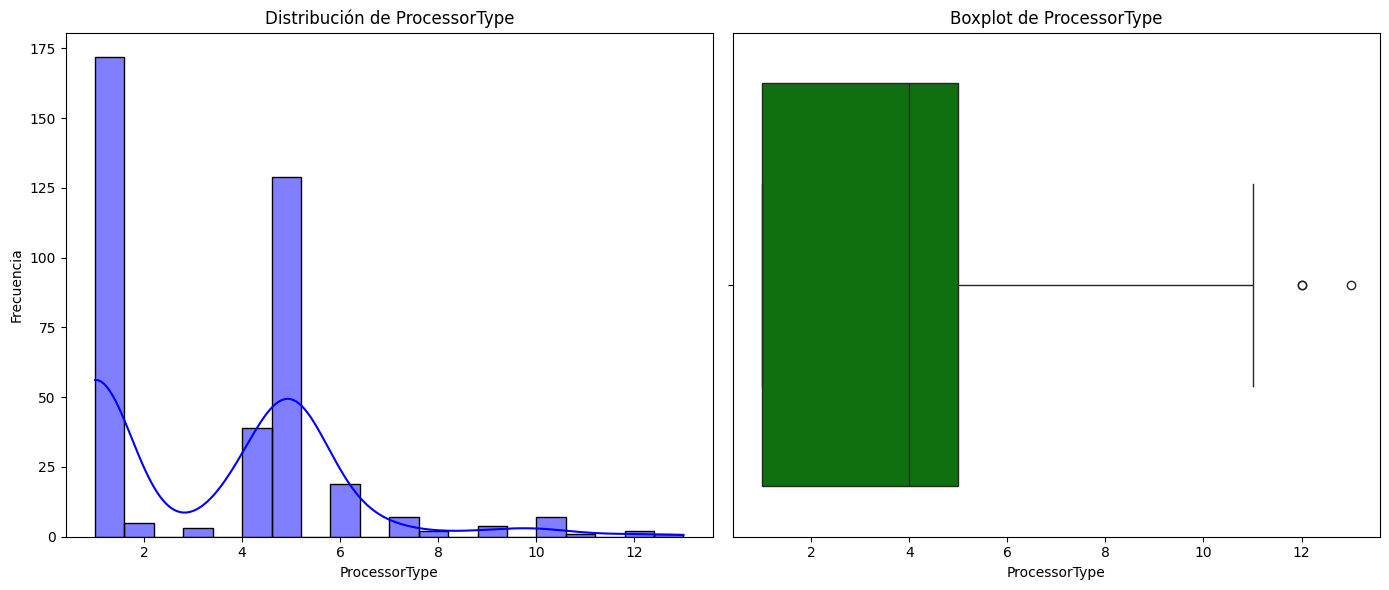

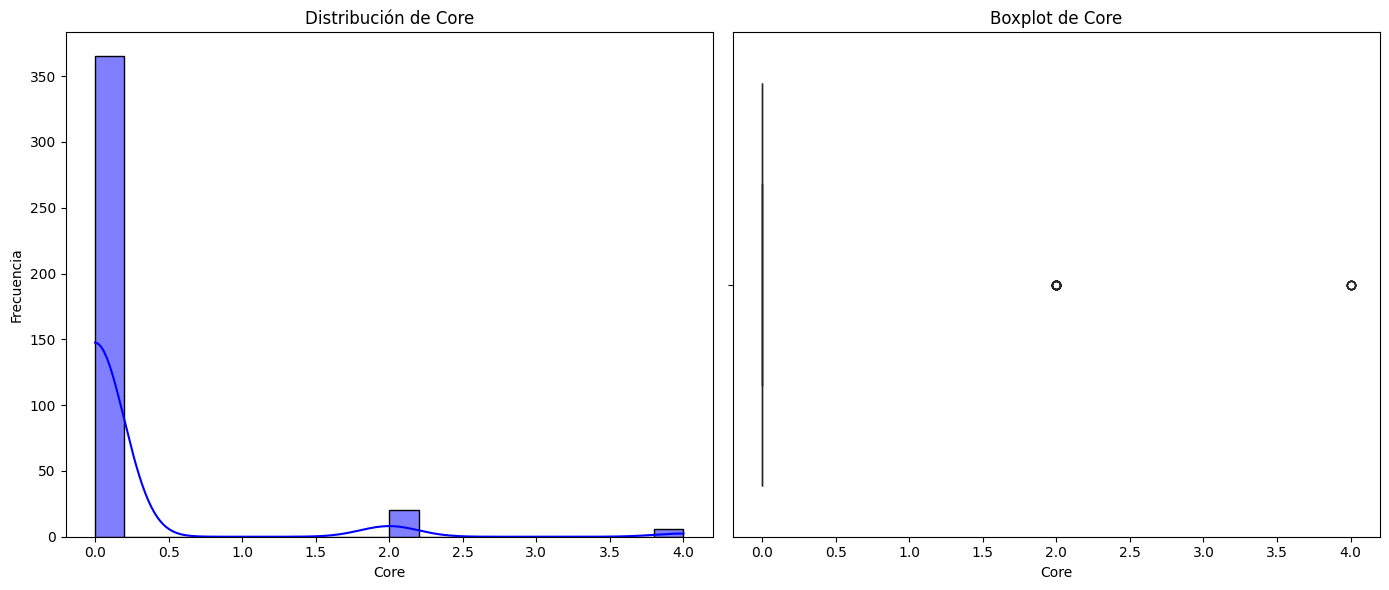

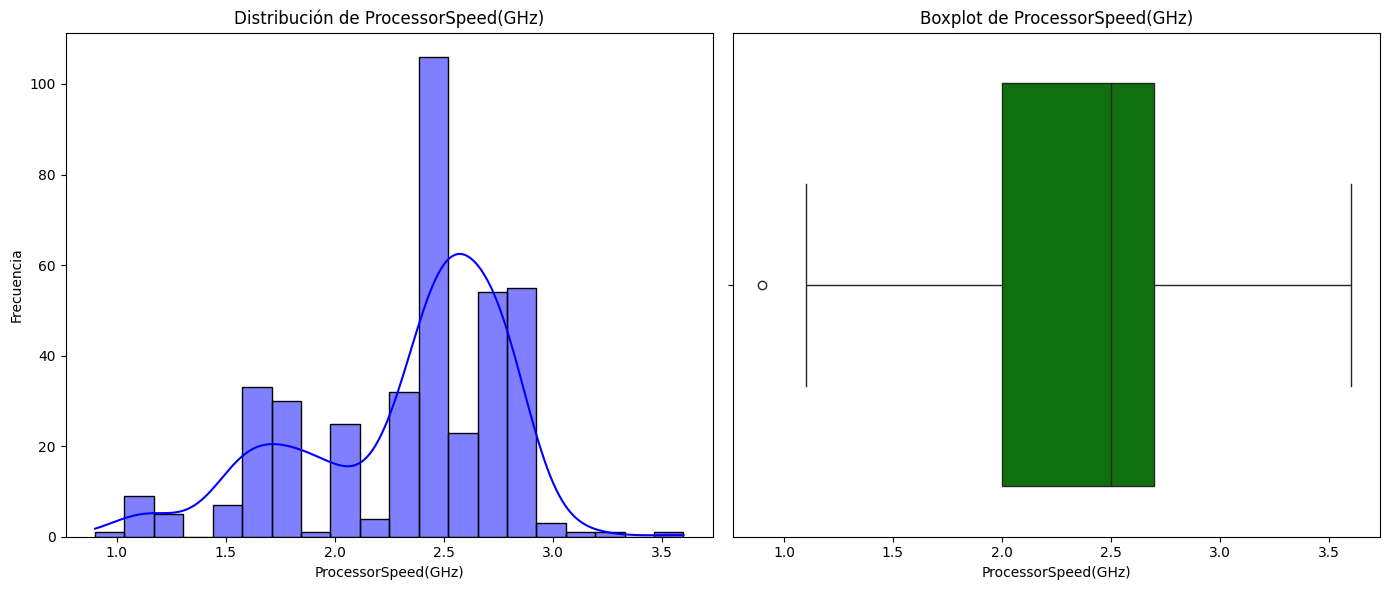

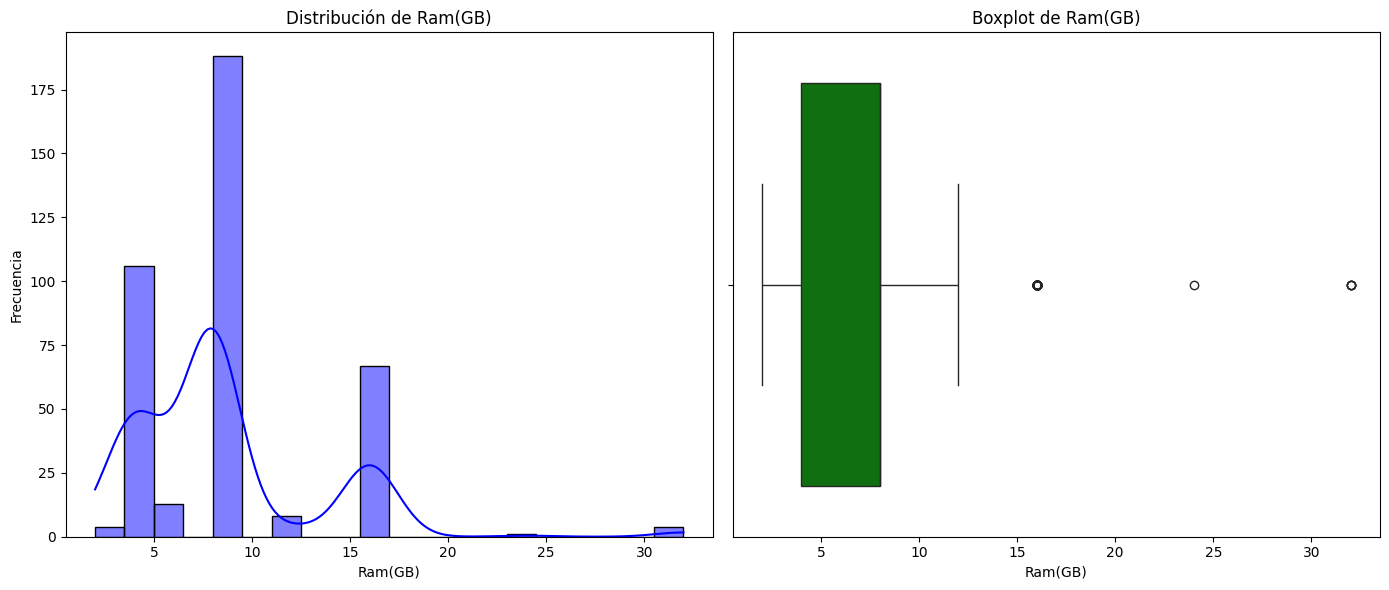

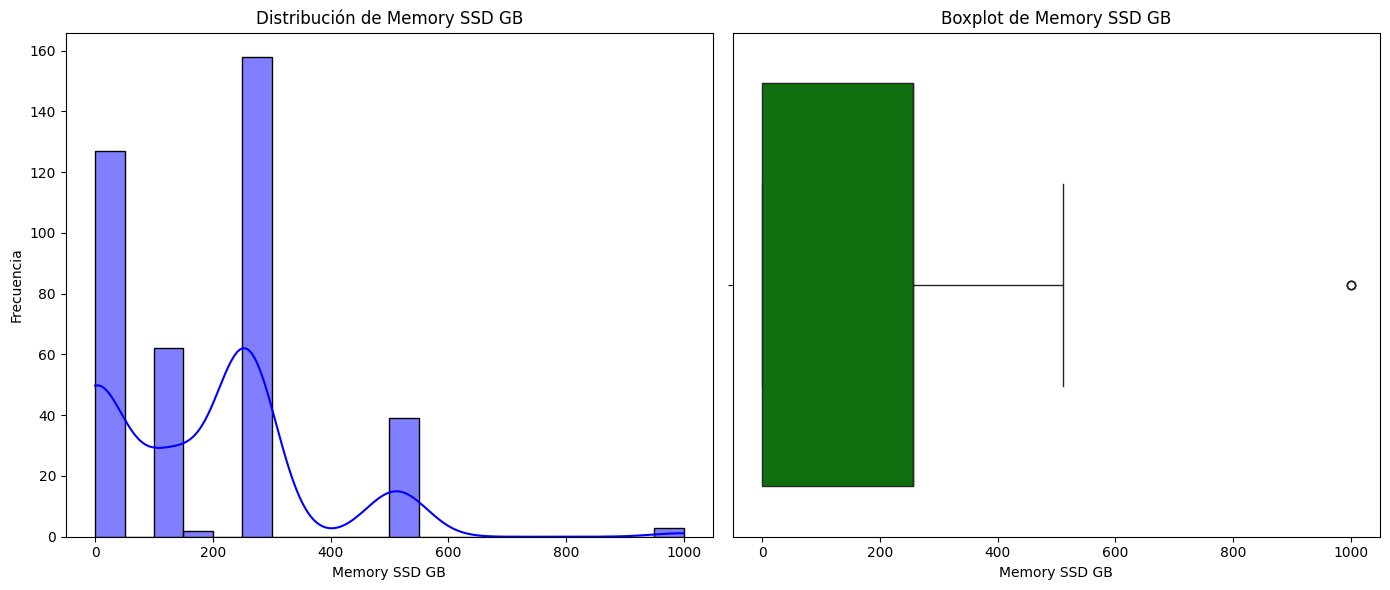

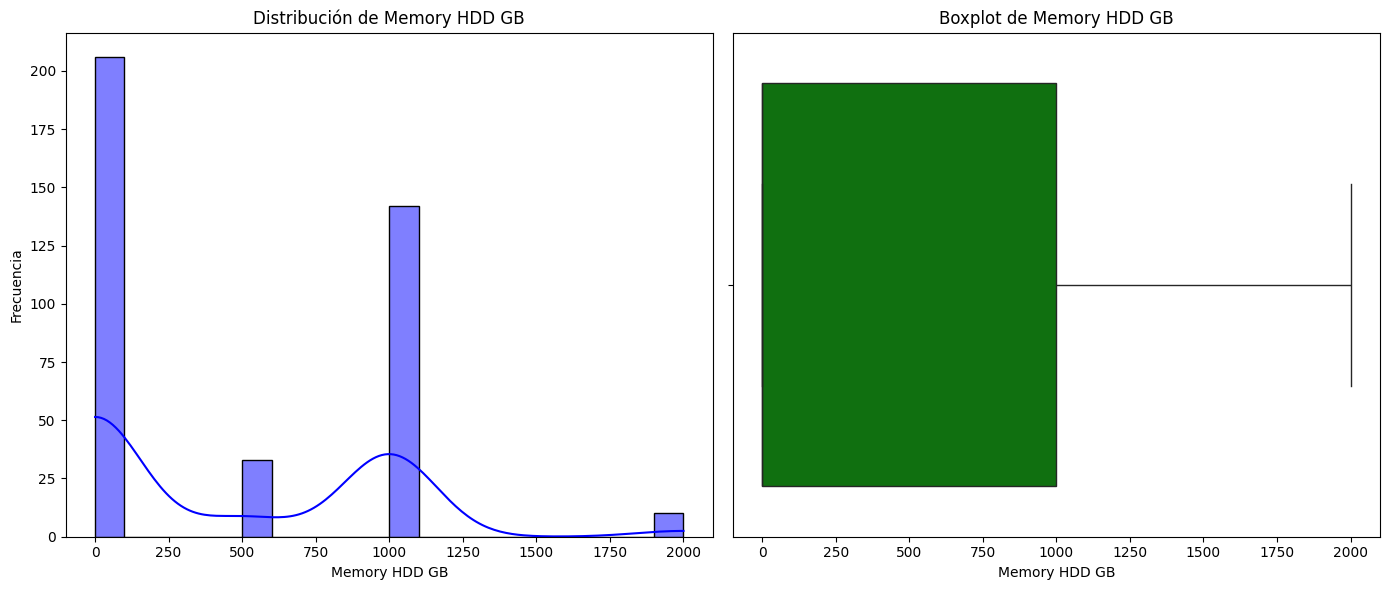

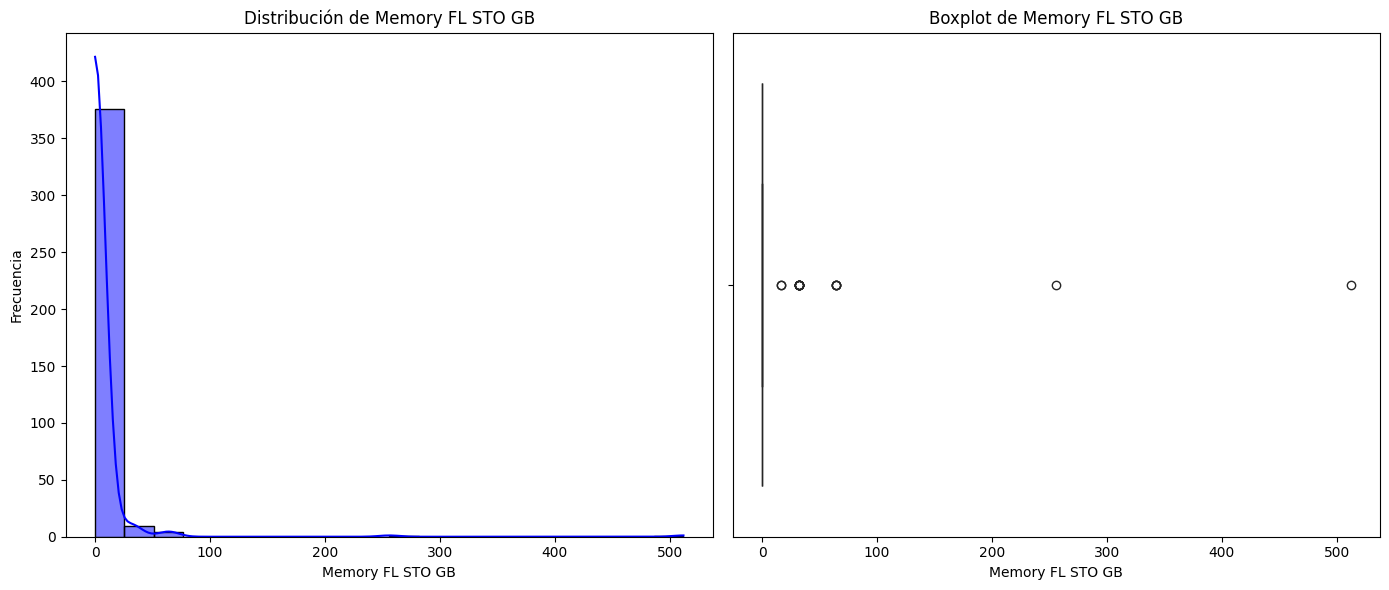

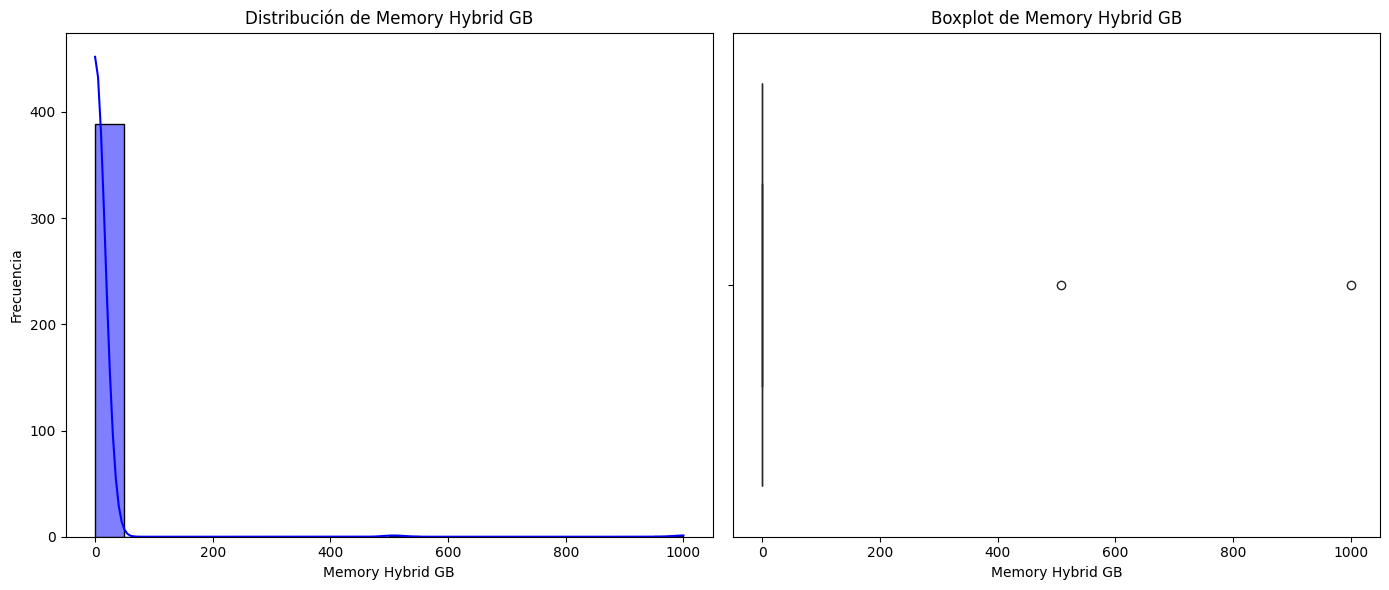

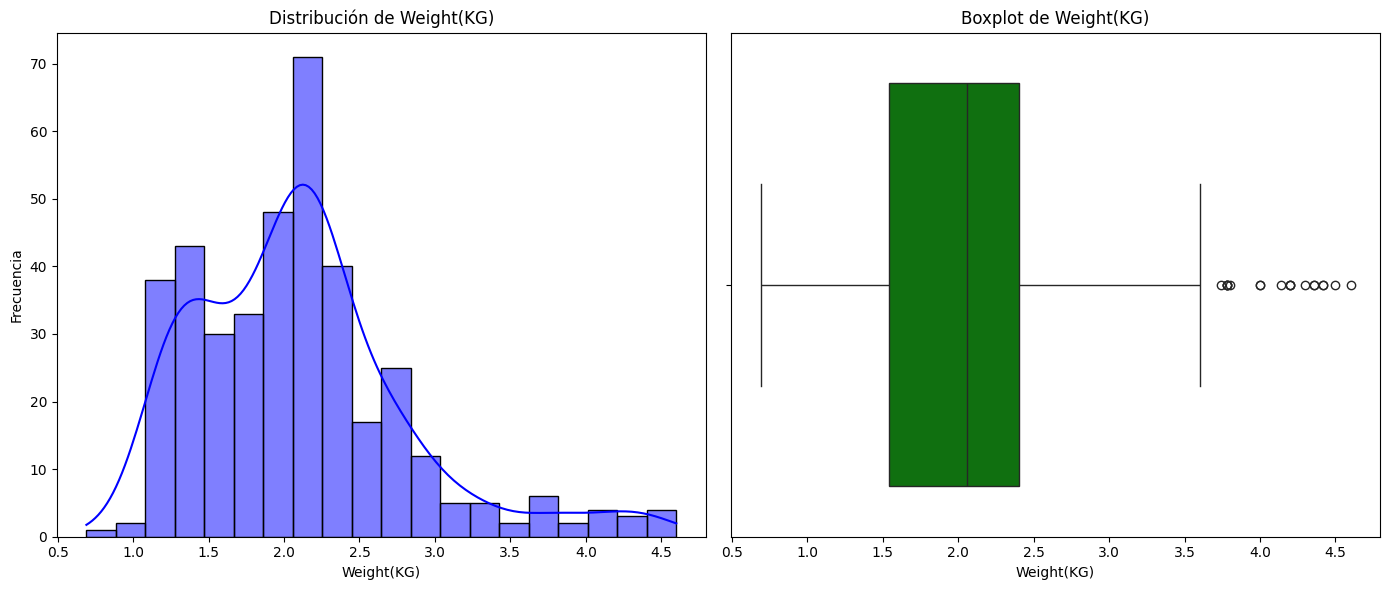

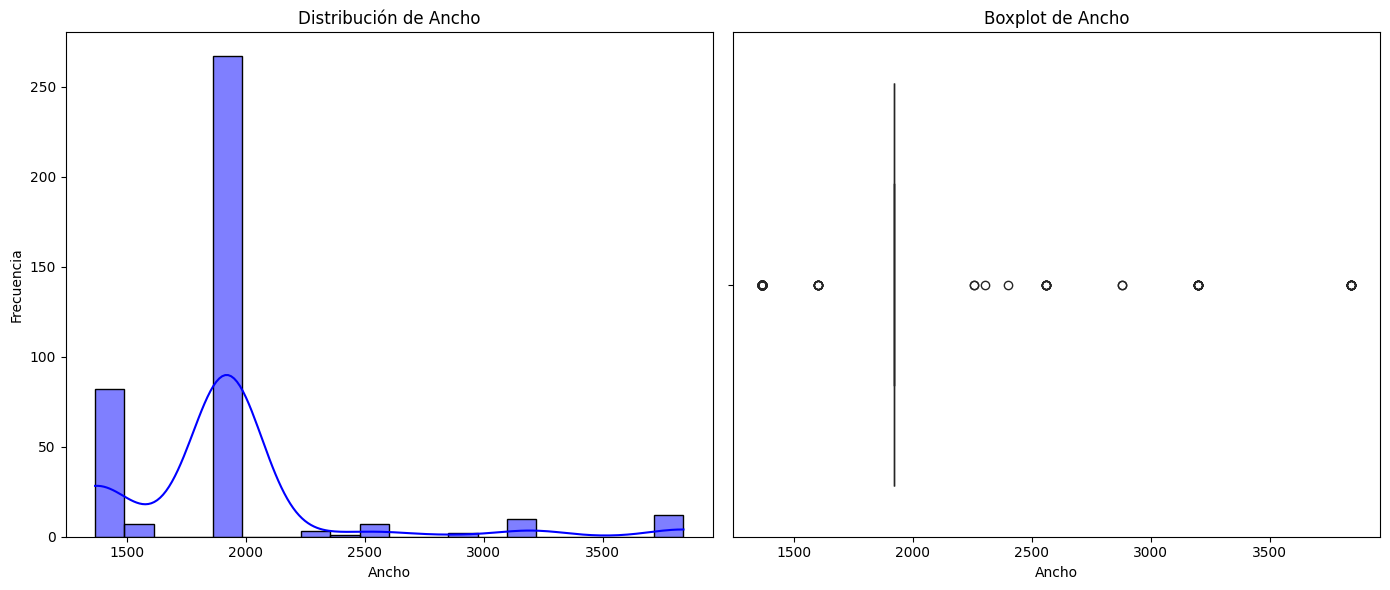

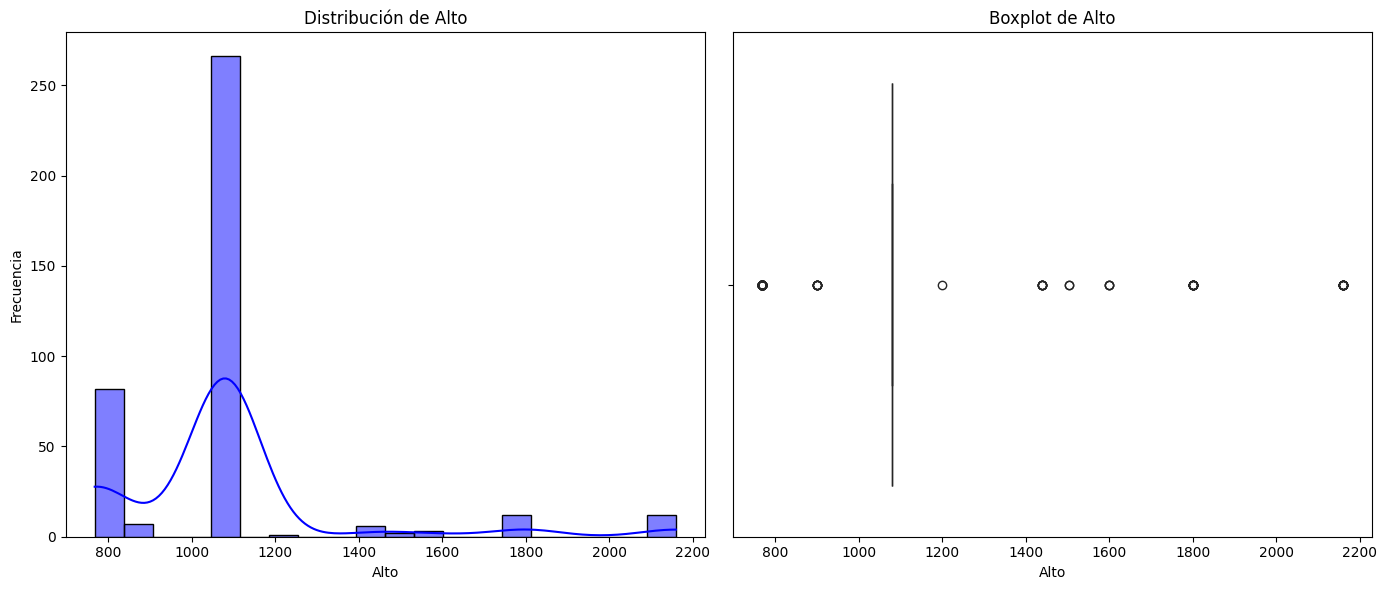

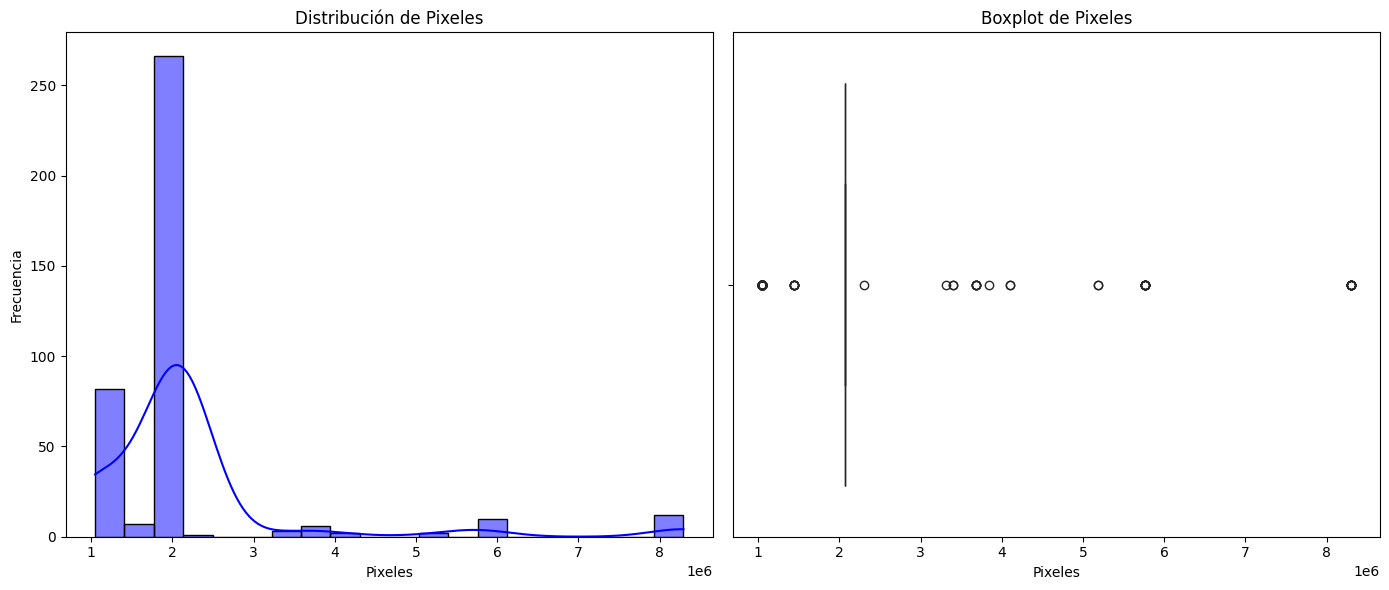

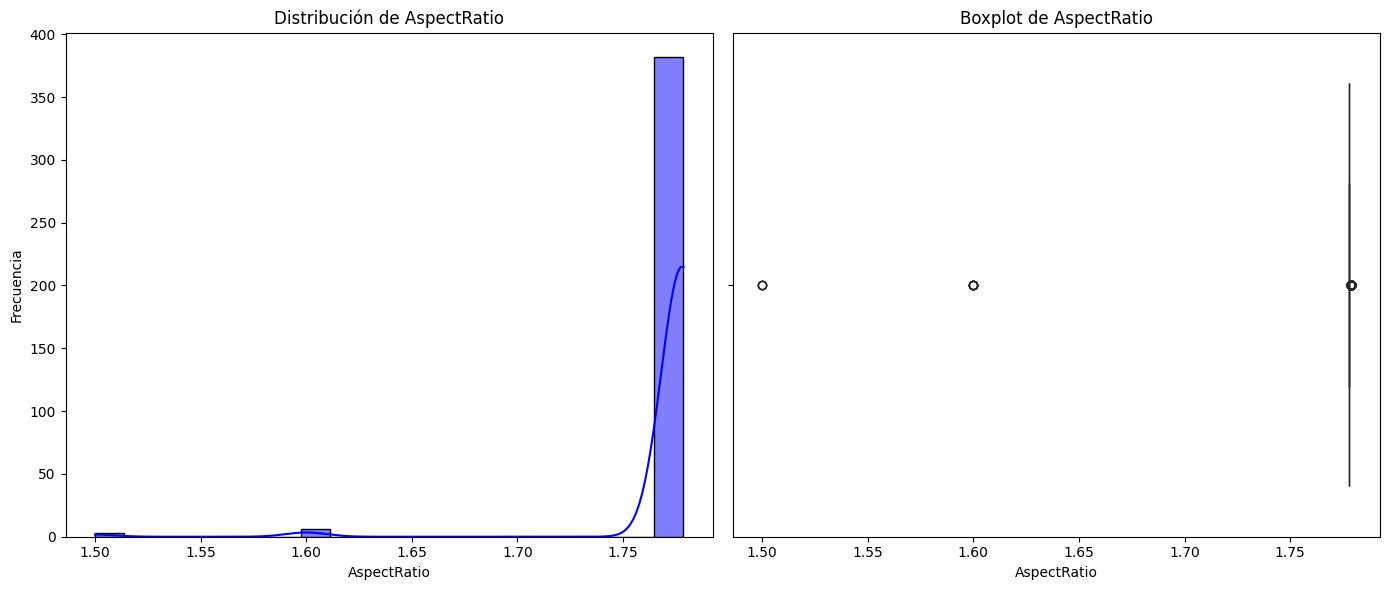

In [183]:
clase.plot_numeric()

In [184]:
# Q1_price = df['Price_euros'].quantile(0.25)
# Q3_price = df['Price_euros'].quantile(0.75)
# IQR_price = Q3_price - Q1_price

# upper_limit_price = Q3_price + 1.5 * IQR_price

# # Identificar valores fuera del rango IQR
# outl_price = df[df['Price_euros'] > upper_limit_price]
# outl_price[['Company','Product','Price_euros']]

En la variable de precios vemos que hay ciertos outliers, como vimos anteriormente el max superaba los 5000€. Es normal que existan PC mas costosos que otros.

In [185]:
Q1_weight = df['Weight(KG)'].quantile(0.25)
Q3_weight = df['Weight(KG)'].quantile(0.75)
IQR_weight = Q3_weight - Q1_weight

upper_limit_weight = Q3_weight + 1.5 * IQR_weight

# Identificar valores fuera del rango IQR
outl_weight = df[df['Weight(KG)'] > upper_limit_weight]
outl_weight[['Company','Product','Weight(KG)']]

,Company,Product,Weight(KG)
6,MSI,GT72VR Dominator,3.78
15,MSI,GT80S 6QE,4.50
20,HP,Omen 17 an012dx,3.74
58,Asus,Rog G752VY GC229T,4.30
75,Dell,Alienware 17,4.36
86,Acer,Predator 17,4.20
102,Asus,Rog G752VT GC073T,4.00
120,HP,Omen 17 AN010nv,3.78
137,Dell,Alienware 17,4.36
172,Acer,Predator G9 793,4.20


En la columna weigh tenemos estos outliers, Alienware 17 es el pc que mas se repite en los outliers.

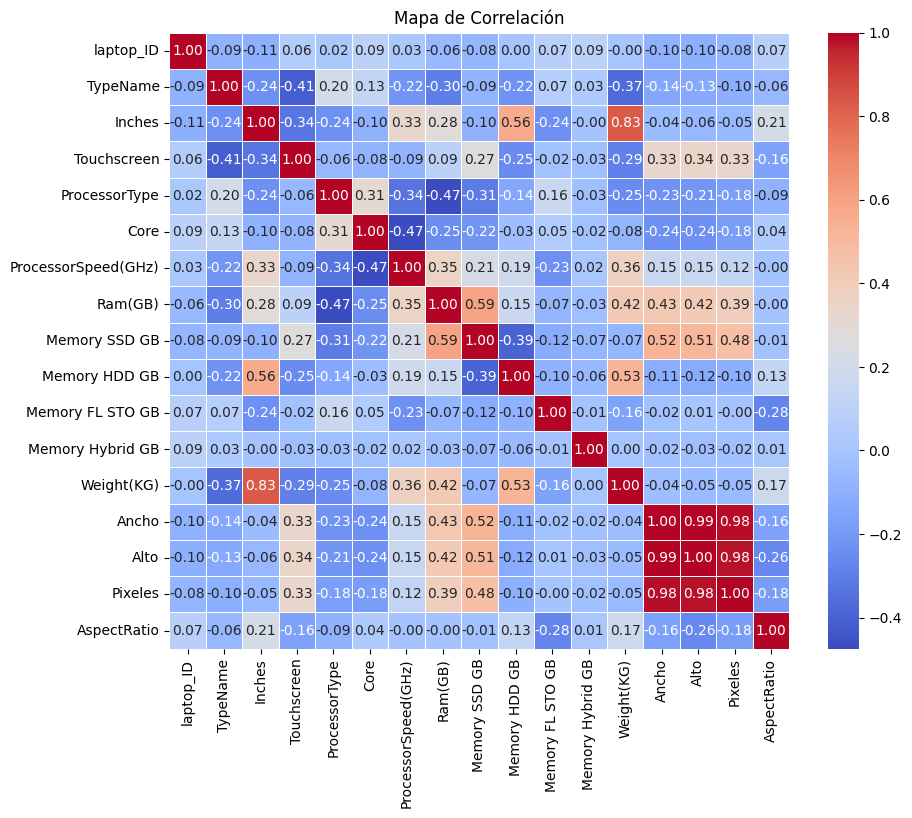

In [186]:
df_numeric = df.select_dtypes('number')
correlation_matrix = df_numeric.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Mapa de Correlación")
plt.show()

- Vemos que en el precio tiene mas corr con la velocidad de procesador y la 2DA memoria.
- El peso y la 2DA memoria tambien tiene un relacion relativamente "alta".
- El peso y las inchas estan muy correlaciones, mientras mas inchas mas peso.


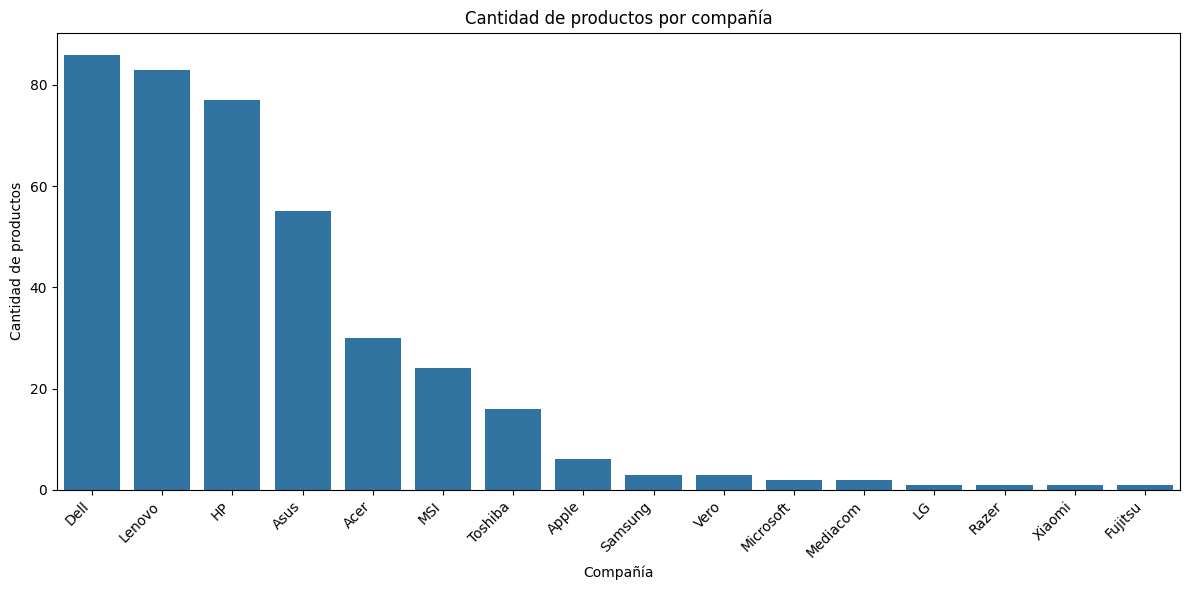

In [187]:
company_counts = df['Company'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=company_counts.index, y=company_counts.values)
plt.title('Cantidad de productos por compañía')
plt.xlabel('Compañía')
plt.ylabel('Cantidad de productos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Observamos que Dell, Lenovo y HP dominan entre las demas compañias.

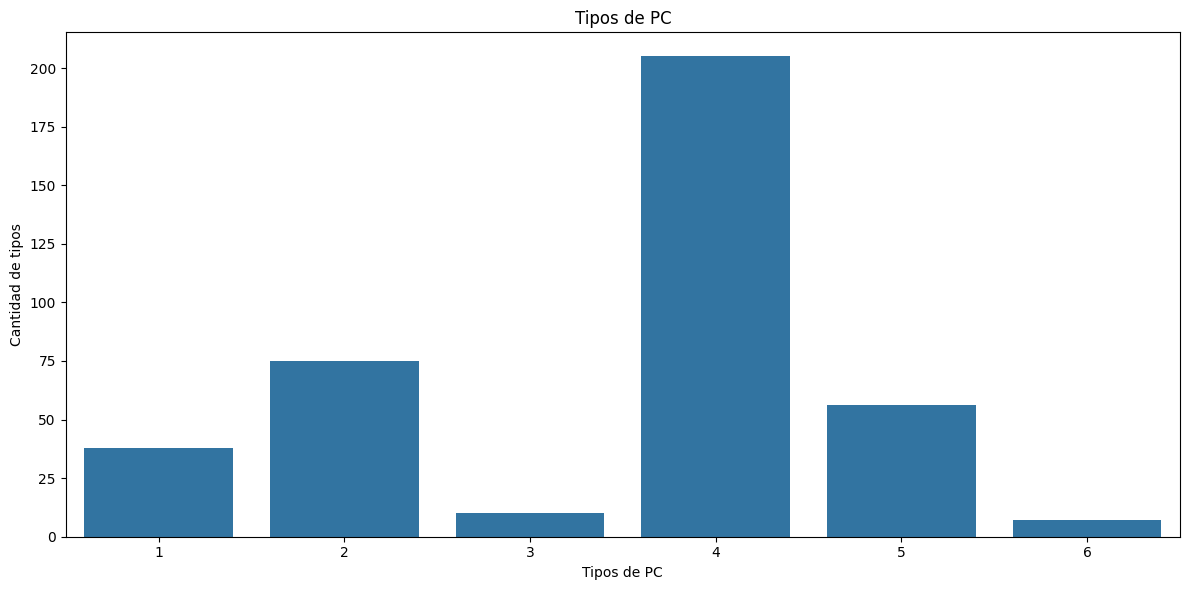

In [188]:
type_counts = df['TypeName'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=type_counts.index, y=type_counts.values)
plt.title('Tipos de PC')
plt.xlabel('Tipos de PC')
plt.ylabel('Cantidad de tipos')
plt.tight_layout()
plt.show()

Vemos que los tipo Notebook son los que mayormente hay.

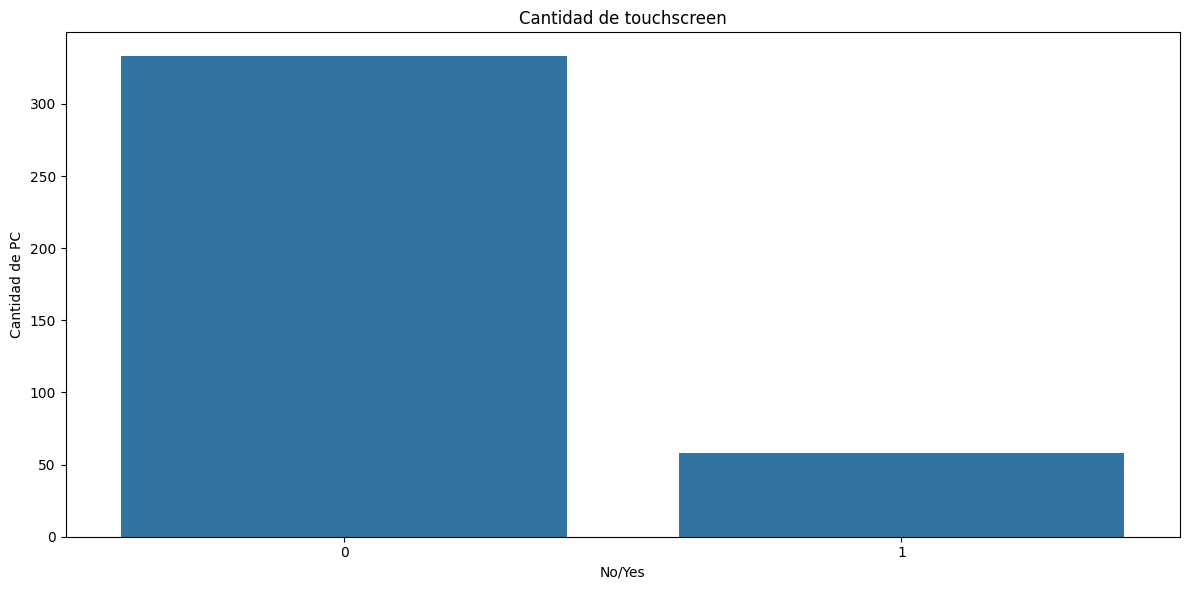

In [189]:
touch_counts = df['Touchscreen'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=touch_counts.index, y=touch_counts.values)
plt.title('Cantidad de touchscreen')
plt.xlabel('No/Yes')
plt.ylabel('Cantidad de PC')
plt.tight_layout()
plt.show()

Vemos que hay gran diferencia entre los PC que no tienen pantalla tactil y los que si.

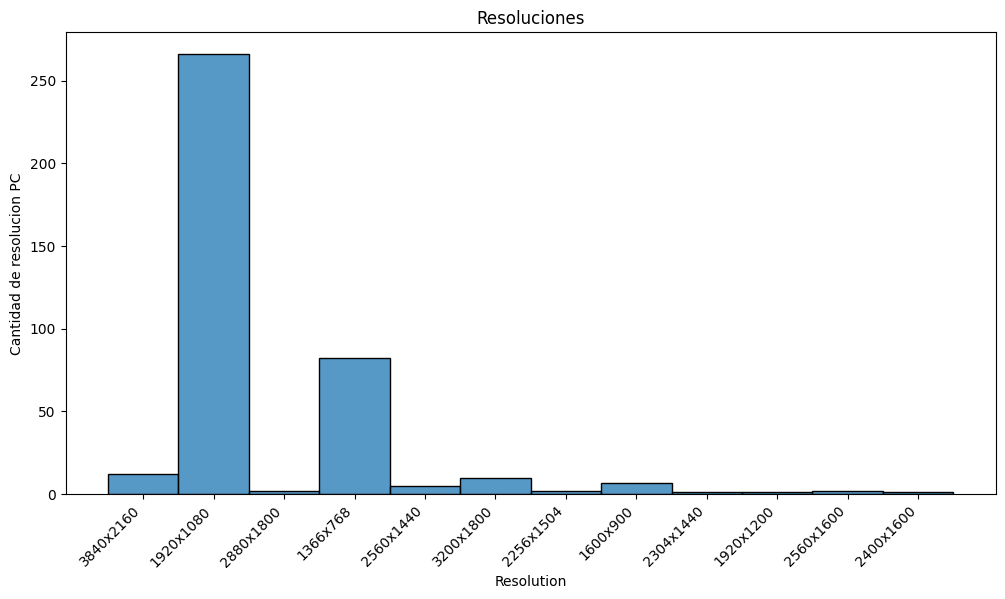

In [190]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Resolution'], discrete=True, kde=False)
plt.title('Resoluciones')
plt.ylabel('Cantidad de resolucion PC')
plt.xticks(rotation=45, ha='right')
plt.show()

La resolucion 1920X1080, es la mas comun entre estos pc.

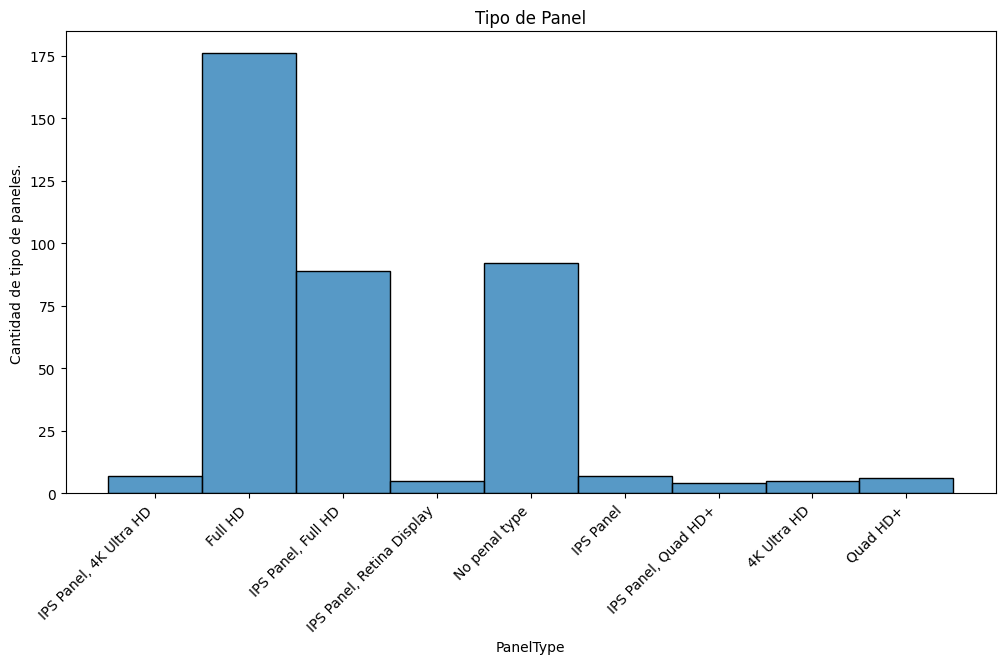

In [191]:
plt.figure(figsize=(12, 6))
sns.histplot(df['PanelType'], discrete=True, kde=False)
plt.title('Tipo de Panel')
plt.ylabel('Cantidad de tipo de paneles.')
plt.xticks(rotation=45, ha='right')

plt.show()

El panel Full HD, el ,as comun entre los pc.

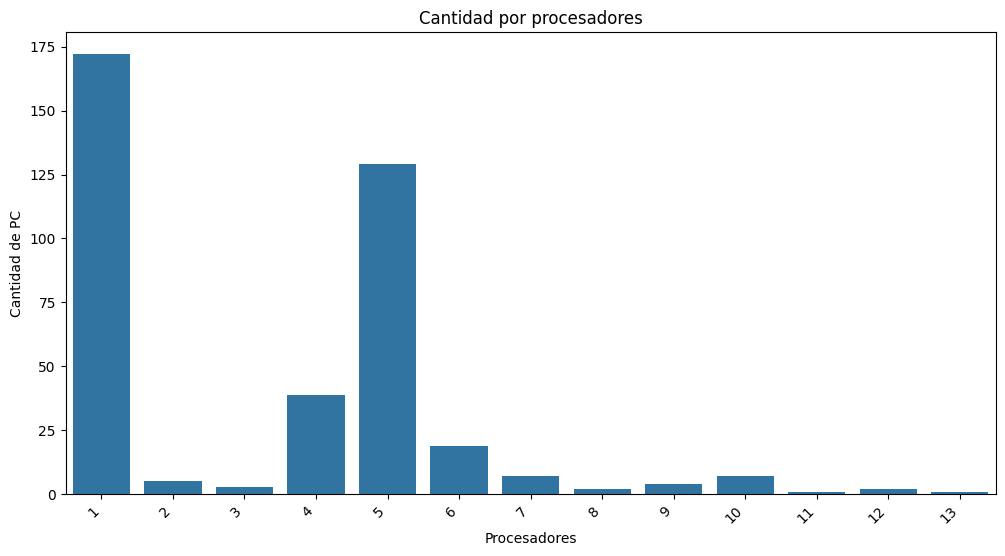

In [192]:
proce_counts = df['ProcessorType'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=proce_counts.index, y=proce_counts.values)
plt.title('Cantidad por procesadores')
plt.xlabel('Procesadores')
plt.ylabel('Cantidad de PC')
plt.xticks(rotation=45, ha='right')
# plt.tight_layout()
plt.show()

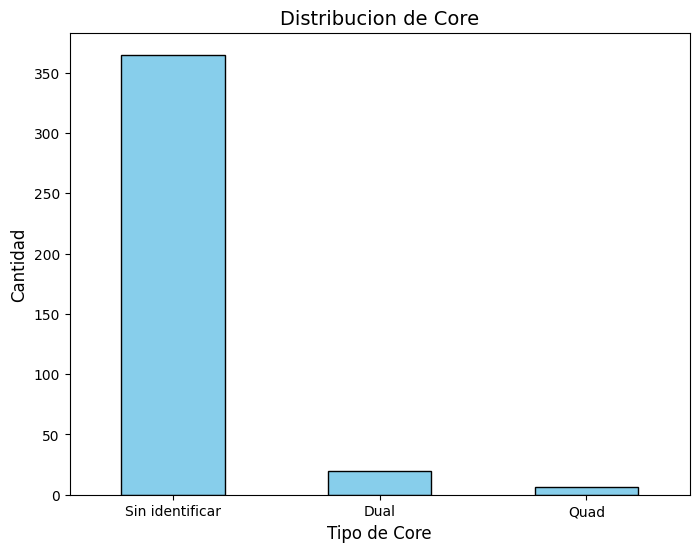

In [193]:
core = df['Core'].value_counts()
core.index = core.index.map({0: 'Sin identificar', 2: 'Dual', 4: 'Quad'})

plt.figure(figsize=(8, 6))
core.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Distribucion de Core', fontsize=14)
plt.xlabel('Tipo de Core', fontsize=12)
plt.ylabel('Cantidad', fontsize=12)
plt.xticks(rotation=0)
plt.show()

Solo tenemos unos pocos Cores especificados, nos pueden servir en un futuro para poder hacer comparaciones entre laptops.

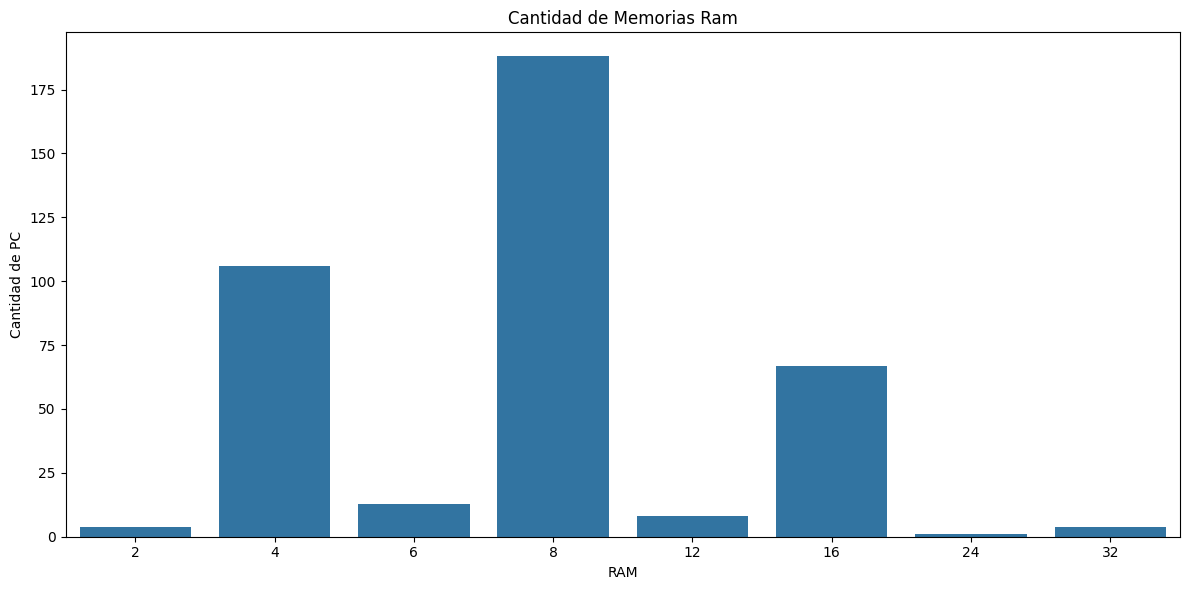

In [194]:
ram_counts = df['Ram(GB)'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=ram_counts.index, y=ram_counts.values)
plt.title('Cantidad de Memorias Ram')
plt.xlabel('RAM')
plt.ylabel('Cantidad de PC')
plt.tight_layout()
plt.show()

Para la sorpresa de nadia.. La de 8GB es la mas frecuente entre los 912 pc.

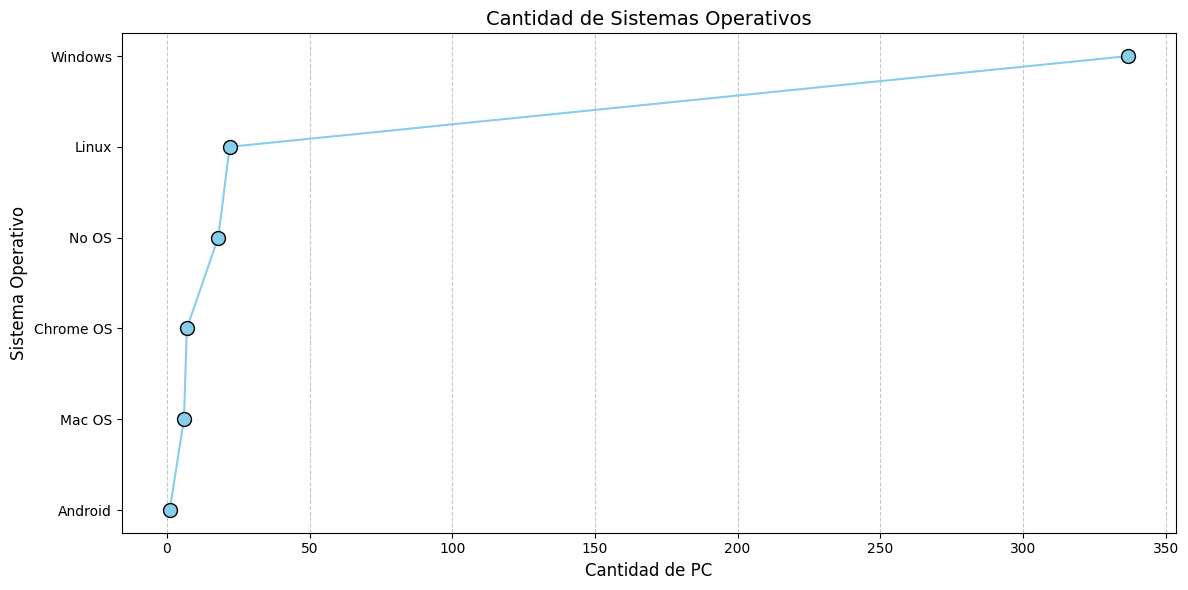

In [195]:
op_counts = df['OpSys'].value_counts(ascending=True)
plt.figure(figsize=(12, 6))
plt.plot(
    op_counts.values, 
    op_counts.index, 
    'o-', color='skyblue', markersize=10, markeredgecolor='black'
)

plt.title('Cantidad de Sistemas Operativos', fontsize=14)
plt.xlabel('Cantidad de PC', fontsize=12)
plt.ylabel('Sistema Operativo', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Terminamos con que WINDOWS es el sistema operativo mas comun entre todos los pc.